# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Andy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


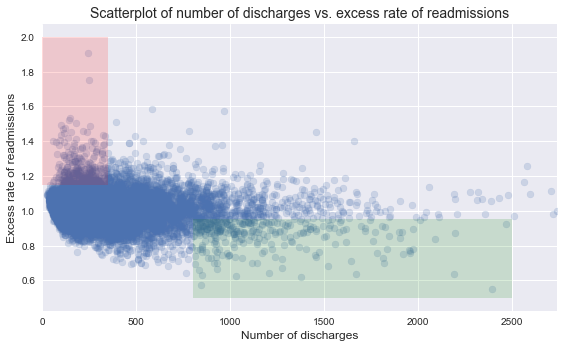

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [6]:
clean_hospital_read_df.iloc[75:85,:]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
14865,"MEMORIAL HOSPITAL, INC TOWANDA",390236,PA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16213,BAYLOR MEDICAL CENTER AT FRISCO,450853,TX,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16234,BAPTIST EMERGENCY HOSPITAL,670078,TX,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16317,JAMESTOWN REGIONAL MEDICAL CENTER,440083,TN,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16339,UNM SANDOVAL REGIONAL MEDICAL CENTER,320089,NM,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14074,LATIMER COUNTY GENERAL HOSPITAL,370072,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


## A. Do you agree with the above analysis and recommendations? Why or why not?
- I was a little skeptical of the above analysis. I agree that there does appear to be a slight trend of excess readmisisons ratio (ERR) decreasing with discharges (NDIS). However, the trend is small, and could be influenced by outliers. Additionally, there was no correlation value or significance given. 
- The chocie of shaded red/green groups seems arbitrary. Were they chosen just to give the desired results? Again, it looks like a few points (possible outliers?) (high ERR for red, low ERR for greeen) could have a large influence on the results. 
- The difference in means, even if significant, is pretty small.
- The above report concludes that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions." While this is a plausible theory, I think much more investigation is needed support this theory, especially before using it as a basis for policy changes that could cost a lot and have large effects.

Test difference between 'small' and 'large' hospitals used in the original analysis:

In [7]:
NDIS = clean_hospital_read_df['Number of Discharges'][81:-3]
ERR = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

df = pd.DataFrame({'NDIS':NDIS,'ERR':ERR})

df_small = df.loc[df.NDIS<100]
df_large = df.loc[df.NDIS>1000]

# check means given above
df_small.ERR.mean()
df_large.ERR.mean()

df_small.describe()


,ERR,NDIS
count,1188.000000,1188.000000
mean,1.022618,74.717172
std,0.057979,16.908819
min,0.893500,25.000000
25%,0.984900,62.000000
50%,1.017750,77.000000
75%,1.052925,89.000000
max,1.495300,99.000000


In [8]:
df_large.describe()

,ERR,NDIS
count,460.000000,460.000000
mean,0.979073,1361.269565
std,0.119358,350.438731
min,0.549500,1002.000000
25%,0.909025,1107.000000
50%,0.986700,1241.000000
75%,1.057100,1508.000000
max,1.454300,2740.000000


I am able to reproduce the means given in the orginal analysis. Next I use t-test to check if this difference in means is significant. It is significant even at $\alpha$ = .01. 

In [9]:
import scipy.stats as stats
stats.ttest_ind(df_small.ERR, df_large.ERR, equal_var=False)

Ttest_indResult(statistic=7.4900620603250729, pvalue=2.7928704570174404e-13)

Boxplots help to visualize the two distributions.

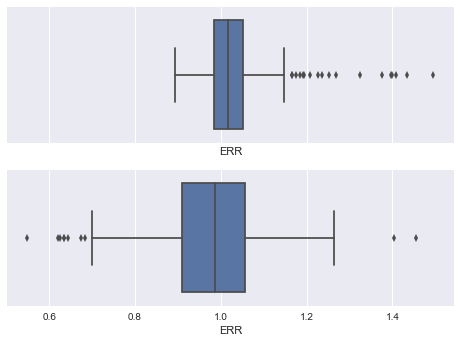

In [10]:
f,(ax1,ax2)= plt.subplots(2,sharex=True)
sns.boxplot(df_small.ERR,ax=ax1,);
sns.boxplot(df_large.ERR, ax=ax2);

Next i'll compute the correlation between NDIS and ERR, and whether it is statistically significant. The pearson r is -0.093, and is sigificant even at the $\alpha$ = .01 level.

(0, 3000)

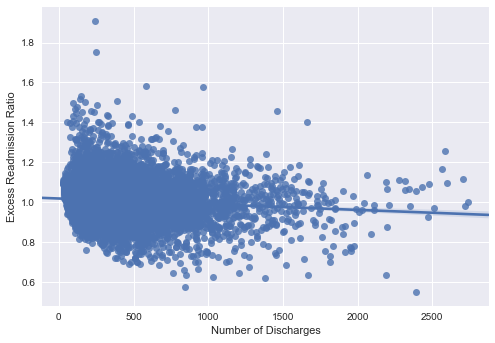

In [11]:
sns.regplot(clean_hospital_read_df['Number of Discharges'][81:-3],clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
ax.set_xlim([0, 3000])

In [12]:
stats.pearsonr(NDIS,ERR)

(-0.093095542875904408, 1.5022756426464526e-23)

Check if removing some possible outliers (based on the original scatterplot) changes the results. The results seem to be realtively robust.

(-0.089889915379417942, 4.7308636135740685e-22)

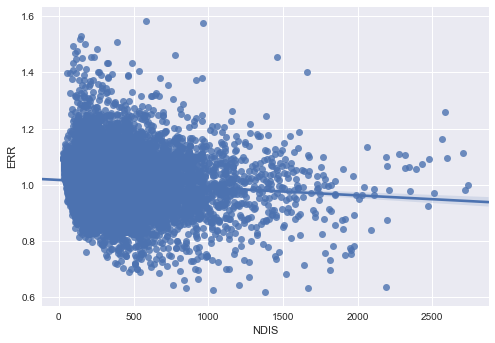

In [13]:
df2 = df.loc[ (df.ERR< 1.6) & (df.ERR>0.6)]
sns.regplot(df2.NDIS,df2.ERR)
stats.pearsonr(df2.NDIS,df2.ERR)

Some states have many more hospitals (due in part to larger population). But if some states with large numbers of hospitals (ie CA,TX,FL,NY) were different, for example due to different state hospital policies, this could have a significant effect on the total analysis.

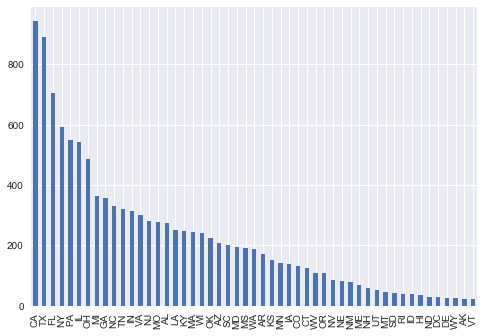

In [14]:
clean_hospital_read_df.State.value_counts().plot(kind='bar')

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Although there is a statistically significant (negative) correlation between ERR and NDIS, the magnitude is quite small. I would be hesitatnt to enact significant policy changes based on the difference between ERRs of 1.023 and 0.978. 
- My recommendation would be to further investigate possible confounding factors and the cause of this trend. Examining the trend for individual states would probably be a good idea.

## Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.
- Scatter plots are great for visualizing the relationship between two variables. 
- In this case, the large number of points overlapping makes it difficult to see how many there are, even with the alpha value altered. Additionally, there is no indication of the correlation value or significance.
- A hexbin plot overcomes this disadvantage by showing the density of points within each bin. The plot below also gives the pearson r and significance, and shows the individual distributions of each variable on the same figure.

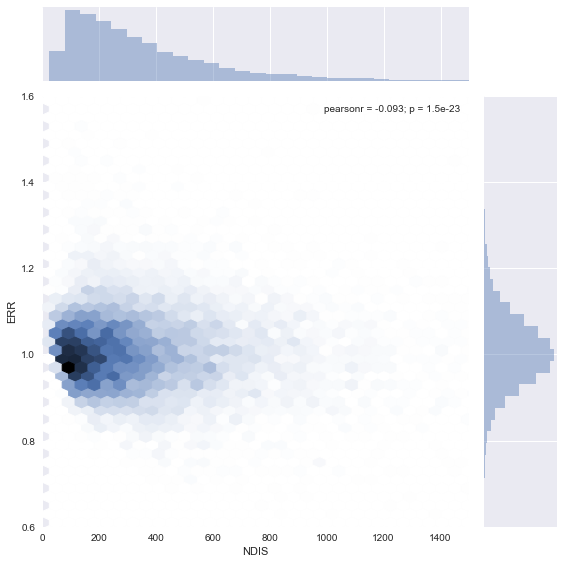

In [15]:
sns.jointplot(df.NDIS, df.ERR, kind="hex",xlim=(0,1500),ylim=(0.6,1.6),size=8,joint_kws={'gridsize':60});